<a href="https://colab.research.google.com/github/bharaniakella/Deep_work/blob/main/ann_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np
import torch.nn.functional as F

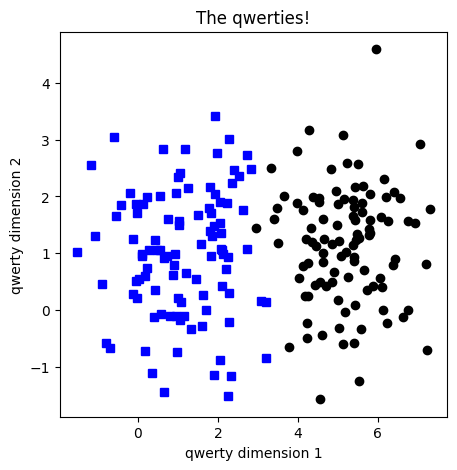

In [26]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [27]:
class annClass(nn.Module):
  def __init__(self):
    super().__init__()

    self.input=nn.Linear(2,1)
    self.output=nn.Linear(1,1)

  def forward(self,x):
    x=self.input(x)
    x=F.relu(x)
    x=self.output(x)
    x=torch.sigmoid(x)
    return x

In [28]:
ann_classify=annClass()

In [29]:
lr=0.05
loss_fun=nn.BCELoss()
optimizer=torch.optim.SGD(ann_classify.parameters(),lr=lr)

In [30]:
num_epochs=1000
losses=torch.zeros(num_epochs)
for epochi in range(num_epochs):
  yhat=ann_classify(data)
  loss=loss_fun(yhat,labels)
  losses[epochi]=loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [31]:
prediction=ann_classify(data)


In [32]:
final_accuracy=torch.mean(((prediction>0.5)==labels).float())
final_accuracy

tensor(0.9850)

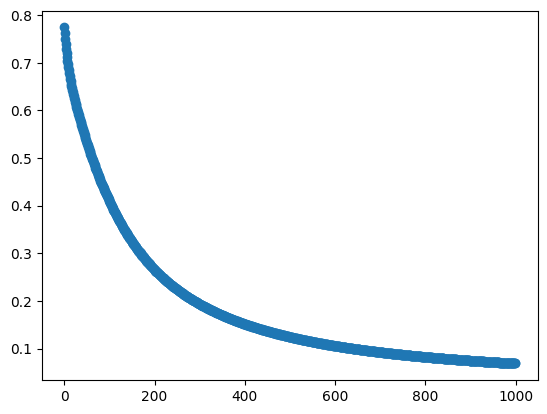

In [34]:
plt.plot(losses.detach(),'o')
plt.show()